In [1]:
import spacy
import numpy as np
import pandas as pd
from spacy import displacy


nlp = spacy.load("en_core_web_sm")
print("Pipeline:", nlp.pipe_names)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


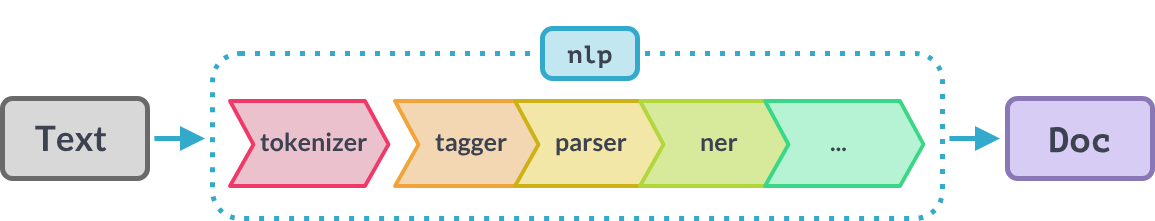

### Token's Linguistic feature & syntactic dependency

      Text: The actual text content of the token.
      Lemma: The base form of the token's word.
      POS: The part-of-speech (POS) tag indicating the grammatical category of the token.
      Tag: Fine-grained POS tag providing more detailed information about the token's role in the sentence.
      Dep: Syntactic dependency label showing the grammatical relationship between the token and its syntactic head.
      Shape: The shape of the token, indicating patterns of uppercase, lowercase, digits, punctuation, etc.
      Is_Alpha: A boolean indicating whether the token consists of alphabetic characters.
      Is_Stop: A boolean indicating whether the token is a stop word (a common word that is often filtered out in natural language processing tasks).

In [5]:

doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

data = []
column_names = ["Text","Lemma", "POS", "Tag", "Dep","Shape","Is_Alpha","Is_Stop"]

for token in doc:
  data.append([token.text,token.lemma_,token.pos_,token.tag_,token.dep_,
               token.tag_,token.is_alpha,token.is_stop])

df = pd.DataFrame(data,columns=column_names)
df

,Text,Lemma,POS,Tag,Dep,Shape,Is_Alpha,Is_Stop
0,Apple,Apple,PROPN,NNP,nsubj,NNP,True,False
1,is,be,AUX,VBZ,aux,VBZ,True,True
2,looking,look,VERB,VBG,ROOT,VBG,True,False
3,at,at,ADP,IN,prep,IN,True,True
4,buying,buy,VERB,VBG,pcomp,VBG,True,False
5,U.K.,U.K.,PROPN,NNP,dobj,NNP,False,False
6,startup,startup,NOUN,NN,dep,NN,True,False
7,for,for,ADP,IN,prep,IN,True,True
8,$,$,SYM,$,quantmod,$,False,False
9,1,1,NUM,CD,compound,CD,False,False


# Creating a span manually

In [10]:
from spacy.tokens import Span
doc = nlp('I live in India')
span = Span(doc,3,4,label="GPE")
span.text

'India'

# Linguistic features

### Syntactic dependencies (predicted by statistical model)

**Syntactic head** - grammatical relationship within the sentence, according to the dependency parsing performed

In [19]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
# Dependency labels
# Syntactic head token (governor)
data = []
for token in doc:
  data.append([token.text,token.dep_,token.head.text])

df = pd.DataFrame(data,columns=['Token','Dependency Label','Syntactic Head'])
df



,Token,Dependency Label,Syntactic Head
0,Apple,nsubj,looking
1,is,aux,looking
2,looking,ROOT,looking
3,at,prep,looking
4,buying,pcomp,at
5,U.K.,dobj,buying
6,startup,dep,looking
7,for,prep,startup
8,$,quantmod,billion
9,1,compound,billion


### Named Entities (predicted by statistical model)

In [15]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
# Text and label of named entity span
for ent in doc.ents:
  print((ent.text,ent.label_))


('Apple', 'ORG')
('U.K.', 'GPE')
('$1 billion', 'MONEY')


### Sentences (usually needs the dependency parser)

**Document-level embeddings** :  which are essentially an aggregation of the embeddings of individual tokens in the document.

document embeddings can still be useful for various tasks such as document classification, clustering, and similarity calculations.

**doc.sents** can be used for sentence boundary detection


In [28]:
from sklearn.cluster import KMeans

doc = nlp("Apple is looking at buying U.K. startup for $1 billion. Google is considering investing in the project. Microsoft recently acquired a cybersecurity firm for $10 million.")

doc_embed = doc.vector
print(f"Doc embediings shape : {doc_embed.shape}")

# doc.sents is a generator that yields sentence spans
data = []
for sent in doc.sents:
  data.append([sent.text,sent.vector])

df = pd.DataFrame(data,columns=['Sentence','Sentence Embeddings'])

num_clusters = 2  # Number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(list(df['Sentence Embeddings']))
df['Cluster'] = kmeans.labels_
df[['Sentence','Cluster']]


Doc embediings shape : (96,)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Sentence,Cluster
0,Apple is looking at buying U.K. startup for $1...,1
1,Google is considering investing in the project.,0
2,Microsoft recently acquired a cybersecurity fi...,1


### Base noun phrases (needs the tagger and parser)

In [35]:
from spacy import displacy

doc = nlp("Apple is looking at buying U.K. startup XYZ for $1 billion")
# doc.noun_chunks is a generator that yields spans
for chunk in doc.noun_chunks:
  print(chunk.text)

# displacy.render(doc, style="dep")

Apple
U.K.


In [34]:
displacy.render(doc, style="ent")

# Word vectors and similarity

In [40]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [44]:
nlp = spacy.load("en_core_web_lg")
print("Pipeline:", nlp.pipe_names)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [41]:

doc1 = nlp("I like cats")
doc2 = nlp("I like dogs")
# Compare 2 documents
print(f"2 document similarity : {doc1.similarity(doc2)}")
# Compare 2 tokens
print(f"2 token similarity : {doc1[2].similarity(doc2[2])}")
# Compare tokens and spans
print(f"Token & Span similarity : {doc1[0].similarity(doc2[1:3])}")


2 document similarity : 0.9853114785298209
2 token similarity : 0.8753712773323059
Token & Span similarity : 0.35636189579963684


In [43]:
doc = nlp("I like cats")
# The L2 norm of the token's vector
print(doc[2].vector.shape)
print(doc[2].vector_norm)

(300,)
49.529755


### Adding custom component to pipeline

In [46]:
from spacy.tokens import Token

# Define the custom component
@spacy.Language.component("add_custom_attribute")
def add_custom_attribute(doc):
    # Iterate over each token in the document
    for token in doc:
        # Add a custom attribute to each token
        token._.is_custom = True  # For example, adding a boolean attribute

    # Return the modified document
    return doc

# Load the English language model
nlp_c = spacy.load("en_core_web_sm")

# Add the custom component to the pipeline
nlp_c.add_pipe("add_custom_attribute", first=True)
print("Pipeline:", nlp_c.pipe_names)

# Process the text
doc = nlp_c("Apple is looking at buying U.K. startup XYZ for $1 billion")

# Access the custom attribute for each token
for token in doc:
    print(token.text, token._.is_custom)

Pipeline: ['add_custom_attribute', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Apple True
is True
looking True
at True
buying True
U.K. True
startup True
XYZ True
for True
$ True
1 True
billion True


# Extension attributes
Custom attributes that are registered on the global Doc, Token and Span classes and become available as ._.

In [72]:
from spacy.tokens import Doc, Token, Span
doc = nlp("The sky over New York is blue")


## Attribute extensions (with default value)

extends the Token class with a custom attribute "is_color" and sets the value of this attribute to True for the token at index 6 in the document.

In [73]:
from spacy.tokens import Token

# Register custom attribute on Token class with force=True
Token.set_extension("is_color", default=False, force=True)

# Overwrite extension attribute with default value
doc[6]._.is_color = True

### Property extensions (with getter & setter)

 access the reverse of the text of a spaCy Document object using the custom attribute "reversed".

In [75]:
from spacy.tokens import Doc
# Register custom attribute on Doc class
get_reversed = lambda doc: doc.text[::-1]
Doc.set_extension("reversed", getter=get_reversed,force=True)
# Compute value of extension attribute with getter
doc._.reversed

'eulb si kroY weN revo yks ehT'

### Method extensions (callable method)

In [79]:
from spacy.tokens import Span

doc = nlp("The sky over New York is blue")

# Register custom attribute on Span class with force=True
def has_label(span, label):
    # Iterate over tokens in the span and check if any token has the provided label
    for token in span:
        if token.ent_type_ == label:
            return True
    return False

Span.set_extension("has_label", method=has_label, force=True)

# Compute value of extension attribute with method
print(doc[3:5]._.has_label("GPE"))

True


# Rule-based matching

In [62]:
# Matcher is initialized with the shared vocab
from spacy.matcher import Matcher
from spacy.matcher import PhraseMatcher

text = "John Doe is a software engineer working at ABC Tech. He lives in New York City and enjoys hiking in Central Park on weekends. His favorite food is pizza, especially from Joe's Pizza on Broadway. He has a pet dog named Max, who loves playing fetch in the park. John is planning a trip to Paris next month to visit the Louvre Museum."
doc = nlp(text)
nlp = spacy.load("en_core_web_sm")

print("="*300)
print('\n'.join([sent for sent in text.split('.')]))
# Entity Matcher
print("\nEntity Matcher:")
print("="*300)
for ent in doc.ents:
    print(ent.text, ent.label_)

# Phrase Matcher
print("\nPhrase Matcher:")
print("="*300)
phrase_matcher = PhraseMatcher(nlp.vocab)
phrases = ["New York City", "Central Park", "pizza", "Joe's Pizza", "Max", "Paris", "Louvre Museum"]
patterns = [nlp(text) for text in phrases]
phrase_matcher.add("PHRASES", None, *patterns)

for match_id, start, end in phrase_matcher(doc):
    print(doc[start:end])

# Dependency Matcher
print("\nDependency Matcher:")
print("="*300)
matcher = Matcher(nlp.vocab)
pattern = [{"LOWER": "enjoys"}, {"LEMMA": "hike"}, {"LOWER": "in"}, {"LOWER": "central"}, {"LOWER": "park"}]
matcher.add("Hiking", [pattern])

matches = matcher(doc)
for match_id, start, end in matches:
    print(doc[start:end])

John Doe is a software engineer working at ABC Tech
 He lives in New York City and enjoys hiking in Central Park on weekends
 His favorite food is pizza, especially from Joe's Pizza on Broadway
 He has a pet dog named Max, who loves playing fetch in the park
 John is planning a trip to Paris next month to visit the Louvre Museum


Entity Matcher:
John Doe PERSON
ABC Tech ORG
New York City GPE
Central Park LOC
Joe PERSON
Broadway FAC
Max PERSON
John PERSON
Paris GPE
next month DATE
the Louvre Museum ORG

Phrase Matcher:
New York City
Central Park
pizza
Joe's Pizza
Max
Paris
Louvre Museum

Dependency Matcher:
enjoys hiking in Central Park


In [ ]:
#